<a href="https://colab.research.google.com/github/PeterMamdouh678/Material-Data-Analysis/blob/main/MaterialAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Reading the Data**

In [408]:
# Importing Libraries

import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as md
from mpl_toolkits.mplot3d import Axes3D
import re
import math
import plotly.express as px


In [409]:
#Reading the data 

path="/content/TouchTracker.csv"
df=pd.read_csv(path,delimiter=";")

### **Checking the Data**

In [410]:
# checking the data
df.head()  

,Study ID,User uniq ID,Exercise name,Time stamp,Coordinate-X,ScreenSize-X,Coordinate-Y,"ScreenSize-Y ,,"
0,KB_LAWEOH,2021612_7651156,17 Touching Materials Wood,2021-06-12 21:10:06.031,"605,9067",1080,"1226,952",2358
1,KB_LAWEOH,2021612_7651156,17 Touching Materials Wood,2021-06-12 21:10:06.131,"566,6213",1080,"1054,225",2358
2,KB_LAWEOH,2021612_7651156,17 Touching Materials Wood,2021-06-12 21:10:06.231,"562,4121",1080,"983,9766",2358
3,KB_LAWEOH,2021612_7651156,17 Touching Materials Wood,2021-06-12 21:10:06.331,"601,2365",1080,"1070,465",2358
4,KB_LAWEOH,2021612_7651156,17 Touching Materials Wood,2021-06-12 21:10:06.432,"635,8456",1080,"1253,952",2358


In [411]:
# Number of Columns and rows
df.shape

(1192, 8)

In [412]:
# Data info
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1192 entries, 0 to 1191
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Study ID          1192 non-null   object
 1    User uniq ID     1192 non-null   object
 2    Exercise name    1192 non-null   object
 3    Time stamp       1192 non-null   object
 4    Coordinate-X     1192 non-null   object
 5    ScreenSize-X     1192 non-null   int64 
 6     Coordinate-Y    1192 non-null   object
 7    ScreenSize-Y ,,  1192 non-null   object
dtypes: int64(1), object(7)
memory usage: 74.6+ KB
None


## Data Cleaning

In [413]:
# Seting the names to be easier while working
df.rename(columns = {"Study ID ":"student-id"," User uniq ID ":"user-uniq-id",\
                     " Exercise name ":"exercise-name"," Time stamp ": "time-stamp",\
                     " Coordinate-X ":"coordinate-x"," ScreenSize-X ":"screenSize-x",\
                     "  Coordinate-Y ":"coordinate-y"," ScreenSize-Y ":"screenSize-y"}\
          , inplace=True)

In [414]:
df['material']=df['exercise-name'].str.replace('17 Touching Materials ','')

In [415]:
# Checking the names
df.head(10)

,student-id,user-uniq-id,exercise-name,time-stamp,coordinate-x,screenSize-x,coordinate-y,"ScreenSize-Y ,,",material
0,KB_LAWEOH,2021612_7651156,17 Touching Materials Wood,2021-06-12 21:10:06.031,"605,9067",1080,"1226,952",2358,Wood
1,KB_LAWEOH,2021612_7651156,17 Touching Materials Wood,2021-06-12 21:10:06.131,"566,6213",1080,"1054,225",2358,Wood
2,KB_LAWEOH,2021612_7651156,17 Touching Materials Wood,2021-06-12 21:10:06.231,"562,4121",1080,"983,9766",2358,Wood
3,KB_LAWEOH,2021612_7651156,17 Touching Materials Wood,2021-06-12 21:10:06.331,"601,2365",1080,"1070,465",2358,Wood
4,KB_LAWEOH,2021612_7651156,17 Touching Materials Wood,2021-06-12 21:10:06.432,"635,8456",1080,"1253,952",2358,Wood
5,KB_LAWEOH,2021612_7651156,17 Touching Materials Wood,2021-06-12 21:10:06.532,"659,4434",1080,"1360,441",2358,Wood
6,KB_LAWEOH,2021612_7651156,17 Touching Materials Wood,2021-06-12 21:10:06.632,"613,0371",1080,"1342,57",2358,Wood
7,KB_LAWEOH,2021612_7651156,17 Touching Materials Wood,2021-06-12 21:10:06.732,"519,779",1080,"1176,932",2358,Wood
8,KB_LAWEOH,2021612_7651156,17 Touching Materials Wood,2021-06-12 21:10:06.843,"474,7081",1080,"995,0817",2358,Wood
9,KB_LAWEOH,2021612_7651156,17 Touching Materials Wood,2021-06-12 21:10:06.941,"467,4902",1080,"857,707",2358,Wood


In [416]:
# Adjusting the numerical data
df.replace(to_replace=r'[,]',value='.',regex=True,inplace=True)
df.head()

,student-id,user-uniq-id,exercise-name,time-stamp,coordinate-x,screenSize-x,coordinate-y,"ScreenSize-Y ,,",material
0,KB_LAWEOH,2021612_7651156,17 Touching Materials Wood,2021-06-12 21:10:06.031,605.9067,1080,1226.952,2358,Wood
1,KB_LAWEOH,2021612_7651156,17 Touching Materials Wood,2021-06-12 21:10:06.131,566.6213,1080,1054.225,2358,Wood
2,KB_LAWEOH,2021612_7651156,17 Touching Materials Wood,2021-06-12 21:10:06.231,562.4121,1080,983.9766,2358,Wood
3,KB_LAWEOH,2021612_7651156,17 Touching Materials Wood,2021-06-12 21:10:06.331,601.2365,1080,1070.465,2358,Wood
4,KB_LAWEOH,2021612_7651156,17 Touching Materials Wood,2021-06-12 21:10:06.432,635.8456,1080,1253.952,2358,Wood


In [417]:
# changing data to be numerical
df['coordinate-x'] = pd.to_numeric(df['coordinate-x'])
df['coordinate-y'] = pd.to_numeric(df['coordinate-y'])

## **Time Stamp Calculation**

In [418]:
# Changing the data to be a time series
df['time-stamp'] = pd.to_datetime(df['time-stamp'])

In [419]:
# Max time
Max = df['time-stamp'].max()

In [420]:
# Min time
Min = df['time-stamp'].min()

In [421]:
# Total time
diff= Max - Min

In [422]:
# Total time in mins
total_mins=diff.total_seconds()/60
total_mins = "{:.4f}".format(total_mins)

In [423]:
# Total time in sec
total_sec=diff.total_seconds()
total_sec

10980.274

## **Exercise Name Cleaning**

### **Material data summery**



In [424]:
# Getting the exercise material names
exercise=df["material"].unique()
exercise

array(['Wood', 'Skin'], dtype=object)

In [ ]:
# Getting the info about the exercise material names
material_dict={}
for i in exercise:
  material_dict[i]=df[df["material"]==i]

print(material_dict)

In [ ]:
material_dict['Skin'].describe().round(4)

In [ ]:
material_dict['Wood'].describe().round(4)

### **Dividing the wood to 10 parts with calculations**

In [428]:
#Generating 10 parts for the wood data

wood_parts={}
wood_num=0
wood_add=87

for i in range(10):

  wood_parts[i]=material_dict['Wood'].iloc[wood_num:wood_add]
  wood_num=wood_add
  wood_add+=87

  if i == 8:

    wood_add+=88

In [429]:
#Generating the coordinates for each parts for wood 

woodParts_first_coorx={}
woodParts_first_coory={}
woodParts_last_coorx={}
woodParts_last_coory={}

for r in range(10):
  #First point coordinate for parts
  woodParts_first_coorx[r]=wood_parts[r]['coordinate-x'].iloc[0]
  woodParts_first_coory[r]=wood_parts[r]['coordinate-y'].iloc[0]

  #Last point coordinate for parts
  woodParts_last_coorx[r]=wood_parts[r]['coordinate-x'].iloc[len(wood_parts[r])-1]
  woodParts_last_coory[r]=wood_parts[r]['coordinate-y'].iloc[len(wood_parts[r])-1]

In [430]:
#Generating the difference in coordinates for wood parts

woodParts_diff_x={}
woodParts_diff_y={}

for e in range(10):

  woodParts_diff_x[e]=abs(woodParts_last_coorx[e] - woodParts_first_coorx[e])
  woodParts_diff_y[e]=abs(woodParts_last_coory[e] - woodParts_first_coory[e])


In [431]:
#Generating the displacement for each wood part

woodParts_displ={}

for p in range(10):
  
  woodParts_displ[p]=math.sqrt((woodParts_diff_x[p]) **2 + (woodParts_diff_y[p]) **2)
  woodParts_displ[p]= "{:.4f}".format(woodParts_displ[p])

In [432]:
#Generating the time for each wood part
woodParts_tmax={}
woodParts_tmin={}
woodParts_tdiff={}
woodParts_inSec={}

for i in range(10):
  #Getting the max and min time for parts
  woodParts_tmax[i]=wood_parts[i]['time-stamp'].max()
  woodParts_tmin[i]=wood_parts[i]['time-stamp'].min()

  #Getting the time difference in sec
  woodParts_tdiff[i]= woodParts_tmax[i] - woodParts_tmin[i]
  woodParts_inSec[i]= woodParts_tdiff[i].total_seconds()


In [433]:
#Generating the speed calculation in mm/Sec and M/Sec
woodParts_speedmm={}
woodParts_speedM={}

for i in range(10):
  #Speed in mm/Sec
  woodParts_speedmm[i]=float(woodParts_displ[i])/woodParts_inSec[i]
  woodParts_speedmm[i]="{:.4f}".format(woodParts_speedmm[i])

  #Speed in M/Sec
  woodParts_speedM[i]=float(woodParts_displ[i])/(1000*woodParts_inSec[i])
  woodParts_speedM[i]="{:.4f}".format(woodParts_speedM[i])


In [434]:
#changing the data from dict to list

i = [1, 2, 3, 4,5,6,7,8,9,20]
woodParts_speed_mm = [None] * len(i)
woodParts_speed_M = [None] * len(i)

for i in range(10):
  woodParts_speed_mm[i]=(woodParts_speedmm[i])
  woodParts_speed_M[i]=(woodParts_speedM[i])
  


### **Dividing the skin to 8 parts with calculations**

In [435]:
#Generating 8 parts for the Skin data

skin_parts={}
skin_num=0
skin_add=40

for i in range(8):

  skin_parts[i]=material_dict['Skin'].iloc[skin_num:skin_add]
  skin_num=skin_add
  skin_add+=40

  if i == 6:

    skin_add+=41

In [436]:
#Generating the coordinates for each parts for wood 

skinParts_first_coorx={}
skinParts_first_coory={}
skinParts_last_coorx={}
skinParts_last_coory={}

for r in range(8):
  #First point coordinate for parts
  skinParts_first_coorx[r]=skin_parts[r]['coordinate-x'].iloc[0]
  skinParts_first_coory[r]=skin_parts[r]['coordinate-y'].iloc[0]

  #Last point coordinate for parts
  skinParts_last_coorx[r]=skin_parts[r]['coordinate-x'].iloc[len(skin_parts[r])-1]
  skinParts_last_coory[r]=skin_parts[r]['coordinate-y'].iloc[len(skin_parts[r])-1]

In [437]:
#Generating the difference in coordinates for wood parts

skinParts_diff_x={}
skinParts_diff_y={}

for e in range(8):

  skinParts_diff_x[e]=abs(skinParts_last_coorx[e] - skinParts_first_coorx[e])
  skinParts_diff_y[e]=abs(skinParts_last_coory[e] - skinParts_first_coory[e])


In [438]:
#Generating the displacement for each wood part

skinParts_displ={}

for p in range(8):
  
  skinParts_displ[p]=math.sqrt((skinParts_diff_x[p]) **2 + (skinParts_diff_y[p]) **2)
  skinParts_displ[p]= "{:.4f}".format(skinParts_displ[p])

In [439]:
#Generating the time for each wood part

skinParts_tmax={}
skinParts_tmin={}
skinParts_tdiff={}
skinParts_inSec={}

for i in range(8):
  #Getting max and min times for skin parts
  skinParts_tmax[i]=wood_parts[i]['time-stamp'].max()
  skinParts_tmin[i]=wood_parts[i]['time-stamp'].min()

  #Getting the time difference in sec
  skinParts_tdiff[i]= skinParts_tmax[i] - skinParts_tmin[i]
  skinParts_inSec[i]= skinParts_tdiff[i].total_seconds()


In [440]:
#Generating the speed calculation in mm/Sec and M/Sec
skinParts_speedmm={}
skinParts_speedM={}

for i in range(8):
  #Speed in mm/Sec
  skinParts_speedmm[i]=float(skinParts_displ[i])/skinParts_inSec[i]
  skinParts_speedmm[i]="{:.4f}".format(skinParts_speedmm[i])

  #Speed in M/Sec
  skinParts_speedM[i]=float(skinParts_displ[i])/(1000*skinParts_inSec[i])
  skinParts_speedM[i]="{:.4f}".format(skinParts_speedM[i])


In [441]:
#Changing the data from dict to list

i = [1, 2, 3, 4,5,6,7,8]

skinParts_speed_mm = [None] * len(i)
skinParts_speed_M = [None] * len(i)

for i in range(8):
  skinParts_speed_mm[i]=(skinParts_speedmm[i])
  skinParts_speed_M[i]=(skinParts_speedM[i])
  

## **Wood Time Stamp**

In [442]:
#Max wood time stamp
woodMax=df[df["material"]=='Wood']['time-stamp'].max()

In [443]:
#Min wood time stamp
woodMin=df[df["material"]=='Wood']['time-stamp'].min()

In [444]:
#Difference in time
woodDiff = woodMax - woodMin

In [445]:
#Difference in sec
woodSec=woodDiff.total_seconds()

## **Skin Time Stamp**

In [446]:
#Max skin time stamp
skinMax=df[df["material"]=='Skin']['time-stamp'].max()

In [447]:
#Min skin time stamp
skinMin=df[df["material"]=='Skin']['time-stamp'].min()

In [448]:
#Difference in time
skinDiff = skinMax - skinMin

In [449]:
#Difference in sec
skinSec=skinDiff.total_seconds()

## **Total Speed Calculations**

displacement: d^2 = x^2 + y^2

In [450]:
#Start coordinates

first_coorx=df['coordinate-x'][0]

first_coory=df['coordinate-y'][0]

In [451]:
#End Coordinates 

last_coorx=df['coordinate-x'][len(df['coordinate-x'])-1]

last_coory=df['coordinate-y'][len(df['coordinate-y'])-1]


In [452]:
#Difference in coordinates
diff_x= abs(last_coorx - first_coorx)
diff_y= abs(last_coory - first_coory)

In [453]:
#Displacement calculation

displacement = math.sqrt((diff_x) **2 + (diff_y) **2)
displacement = "{:.4f}".format(displacement)
displacement=float(displacement)

In [454]:
#Speed in MM/Sec

speed_mm=displacement/total_sec
speed_mm = "{:.4f}".format(speed_mm)

In [455]:
#Speed in M/Sec

speed_M=displacement/(1000*total_sec)
speed_M = "{:.7f}".format(speed_M)

### **Wood Speed Calculation**

In [456]:
#Wood starting coordinates

wood_coorx1=df[df["material"]=='Wood']['coordinate-x'].iloc[0]

wood_coory1=df[df["material"]=='Wood']['coordinate-y'].iloc[0]

In [457]:
#Wood ending coordinates

wood_coorxLast=df[df["material"]=='Wood']['coordinate-x'].iloc[-1]
wood_cooryLast=df[df["material"]=='Wood']['coordinate-y'].iloc[-1]

In [458]:
#Wood coordinates difference

woodDiff_x= abs(wood_coorxLast - wood_coorx1)
woodDiff_y= abs(wood_cooryLast - wood_coory1)

In [459]:
#Wood difference

woodDisplac = math.sqrt((woodDiff_x) **2 + (woodDiff_y) **2)
woodDisplac = "{:.4f}".format(woodDisplac)
woodDisplac =float(woodDisplac)

In [460]:
# Wood speed in MM/Sec

woodSpeed_mm=woodDisplac/woodSec
woodSpeed_mm = "{:.4f}".format(woodSpeed_mm)

In [461]:
#Wodd speed in M/Sec

woodSpeed_M=woodDisplac/(1000*woodSec)
woodSpeed_M = "{:.6f}".format(woodSpeed_M)
woodSpeed_M

'0.000314'

### **Skin Speed Calculation**

In [462]:
#Skin starting coordinates

skin_coorx1=df[df["material"]=='Skin']['coordinate-x'].iloc[0]

skin_coory1=df[df["material"]=='Skin']['coordinate-y'].iloc[0]

In [463]:
#Skin ending coordinates

skin_coorxLast=df[df["material"]=='Skin']['coordinate-x'].iloc[-1]

skin_cooryLast=df[df["material"]=='Skin']['coordinate-y'].iloc[-1]

In [464]:
#Skin coordinates difference

skinDiff_x= abs(skin_coorxLast - skin_coorx1)

skinDiff_y= abs(skin_cooryLast - skin_coory1)

In [465]:
#Skin difference

skinDisplac = math.sqrt((skinDiff_x) **2 + (skinDiff_y) **2)
skinDisplac = "{:.4f}".format(skinDisplac)
skinDisplac =float(skinDisplac)

In [466]:
#Skin speed in MM/Sec

skinSpeed_mm=skinDisplac/skinSec
skinSpeed_mm = "{:.4f}".format(skinSpeed_mm)

In [467]:
#Skin speed in M/Sec

skinSpeed_M=skinDisplac/(1000*skinSec)
skinSpeed_M = "{:.6f}".format(skinSpeed_M)

## **Plotting**

In [468]:
# Wood coordinates for plotting

wood_x=pd.Series(material_dict['Wood']['coordinate-x']).array
wood_y=pd.Series(material_dict['Wood']['coordinate-y']).array

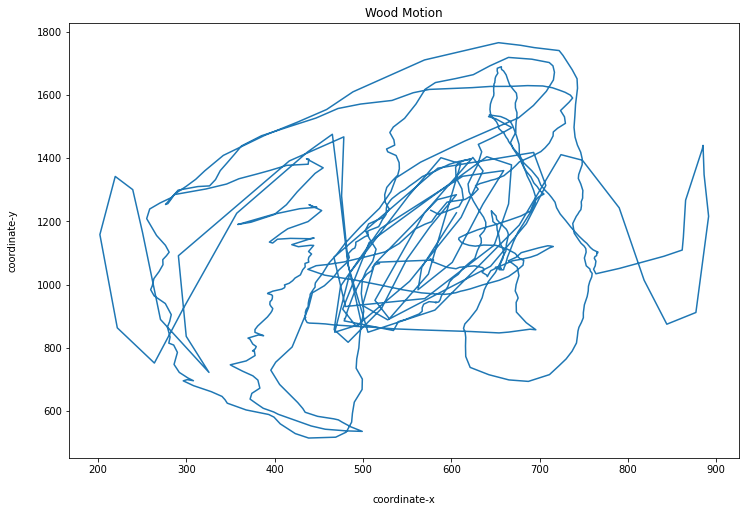

In [469]:
#Wodd plotting

x = np.squeeze(wood_x)
y = np.squeeze(wood_y)

fig = plt.figure(figsize=(12,8))
ax = plt.axes()

ax.plot(x, y);

ax.set_title("Wood Motion")
ax.set_xlabel("coordinate-x",labelpad=20)
ax.set_ylabel("coordinate-y",labelpad=20) 

plt.savefig('Wood_Motion.png')

In [470]:
# Sking coordinate for plotting

skin_x=pd.Series(material_dict['Skin']['coordinate-x']).array
skin_y=pd.Series(material_dict['Skin']['coordinate-y']).array

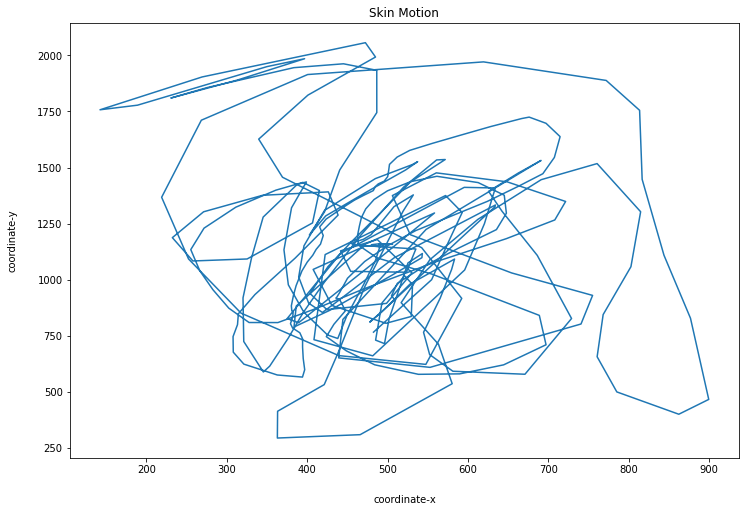

In [471]:
#Sking plotting

x = np.squeeze(skin_x)
y = np.squeeze(skin_y)

fig = plt.figure(figsize=(12,8))
ax = plt.axes()

ax.plot(x, y);

ax.set_title("Skin Motion")
ax.set_xlabel("coordinate-x",labelpad=20)
ax.set_ylabel("coordinate-y",labelpad=20) 

plt.savefig('Skin_Motion.png')

### **3D Plotting**

In [472]:
skin_x=pd.Series(material_dict['Skin']['coordinate-x']).array
skin_y=pd.Series(material_dict['Skin']['coordinate-y']).array
skin_t=pd.Series(material_dict['Skin']['time-stamp']).array

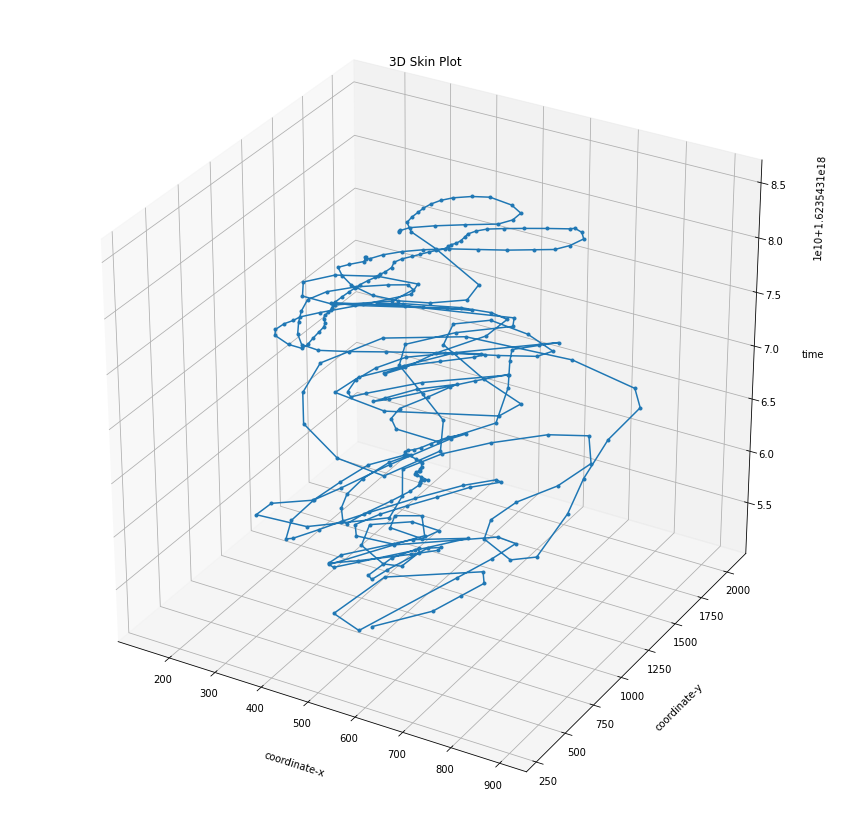

In [473]:
fig = plt.figure(figsize = (15,15))
ax = plt.axes(projection='3d')

ax.grid()


t = skin_t
x = np.squeeze(skin_x)
y = np.squeeze(skin_y)

ax.plot3D(x, y, t,marker='.')
ax.set_title('3D Skin Plot')

# Set axes label
ax.set_xlabel('coordinate-x', labelpad=20)
ax.set_ylabel('coordinate-y', labelpad=20)
ax.set_zlabel('time', labelpad=20)

plt.savefig('3D Skin_Motion.png')

In [474]:
wood_x=pd.Series(material_dict['Wood']['coordinate-x']).array
wood_y=pd.Series(material_dict['Wood']['coordinate-y']).array
wood_t=pd.Series(material_dict['Wood']['time-stamp']).array


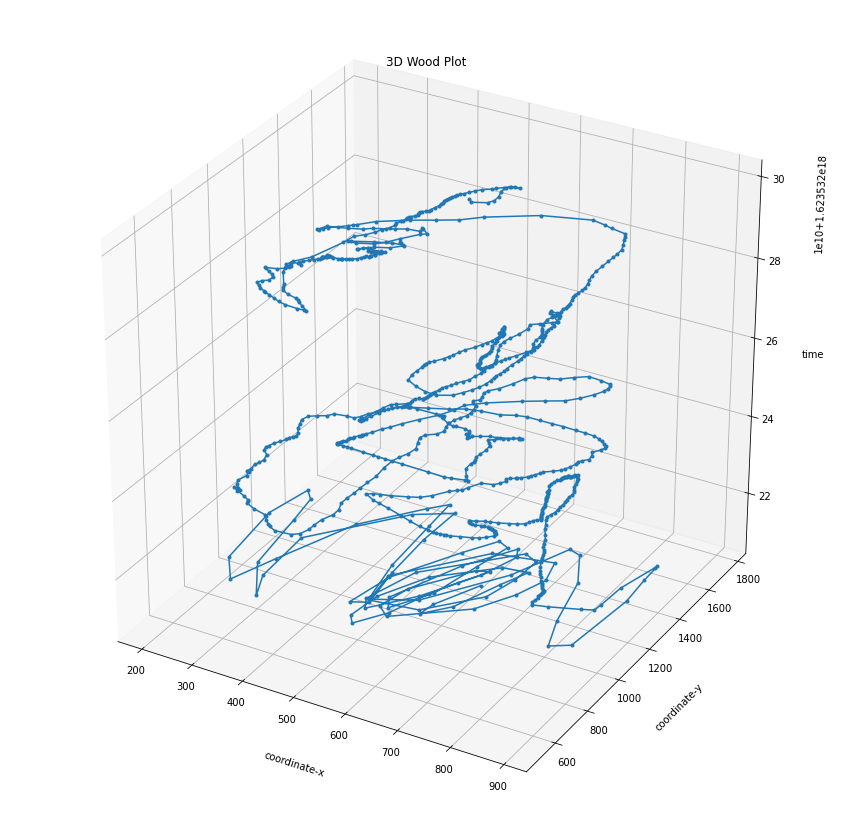

In [475]:
fig = plt.figure(figsize = (15,15))
ax = plt.axes(projection='3d')

ax.grid()

t = wood_t
x = np.squeeze(wood_x)
y = np.squeeze(wood_y)

ax.plot3D(x, y, t,marker='.')
ax.set_title('3D Wood Plot')

# Set axes label
ax.set_xlabel('coordinate-x', labelpad=20)
ax.set_ylabel('coordinate-y', labelpad=20)
ax.set_zlabel('time', labelpad=20)

plt.savefig('3D Wood_Motion.png')


## **Extracting Data**

In [ ]:
#Extracting Wood data

woodDf=df[df["material"]=='Wood']

# Total Wood speed
woodDf['total material speed in mm/s']=woodSpeed_mm
woodDf['total material speed in M/s']=woodSpeed_M

# Wood Parts Speed
woodDf['part speed in M/s']=''
woodDf['part speed in mm/s']=''

k=0

for j in range(10):
  if j !=9:
    for i in range(87):
      woodDf['part speed in M/s'][i+k]=woodParts_speed_M[j]
      woodDf['part speed in mm/s'][i+k]=woodParts_speed_mm[j]
  else:
    for i in range(88):
      woodDf['part speed in M/s'][i+k]=woodParts_speed_M[j]
      woodDf['part speed in mm/s'][i+k]=woodParts_speed_mm[j]
        

  k+=87

#Saving the data
woodDf.to_csv ('wood_dataframe.csv', index = False, header=True)

In [ ]:
#Extracting Skin Data

skinDf=df[df["material"]=='Skin']

# Total Skin speed
skinDf['total material speed in mm/s']=skinSpeed_mm
skinDf['total material speed in M/s']=skinSpeed_M

# Skin Parts Speed
skinDf['part speed in M/s']=''
skinDf['part speed in mm/s']=''

k=871

for j in range(8):
  if j !=7:
    for i in range(40):
      skinDf['part speed in M/s'][i+k]=skinParts_speed_M[j]
      skinDf['part speed in mm/s'][i+k]=skinParts_speed_mm[j]
  else:
    for i in range(41):
      skinDf['part speed in M/s'][i+k]=skinParts_speed_M[j]
      skinDf['part speed in mm/s'][i+k]=skinParts_speed_mm[j]
        

  k+=40

#Saving the data

skinDf.to_csv ('skin_dataframe.csv', index = False, header=True)

In [478]:
#Collect the data again and extract it 

materialDf = woodDf.append(skinDf)
materialDf.replace(materialDf['time-stamp'],df['time-stamp'])
materialDf.to_csv ('material_dataframe.csv', index = False, header=True)
